<a href="https://colab.research.google.com/github/ENKI0311/14-Years-of-Bitcoin/blob/main/Google_Unlock_Global_Communication_with_Gemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Gemma 2 Challenge

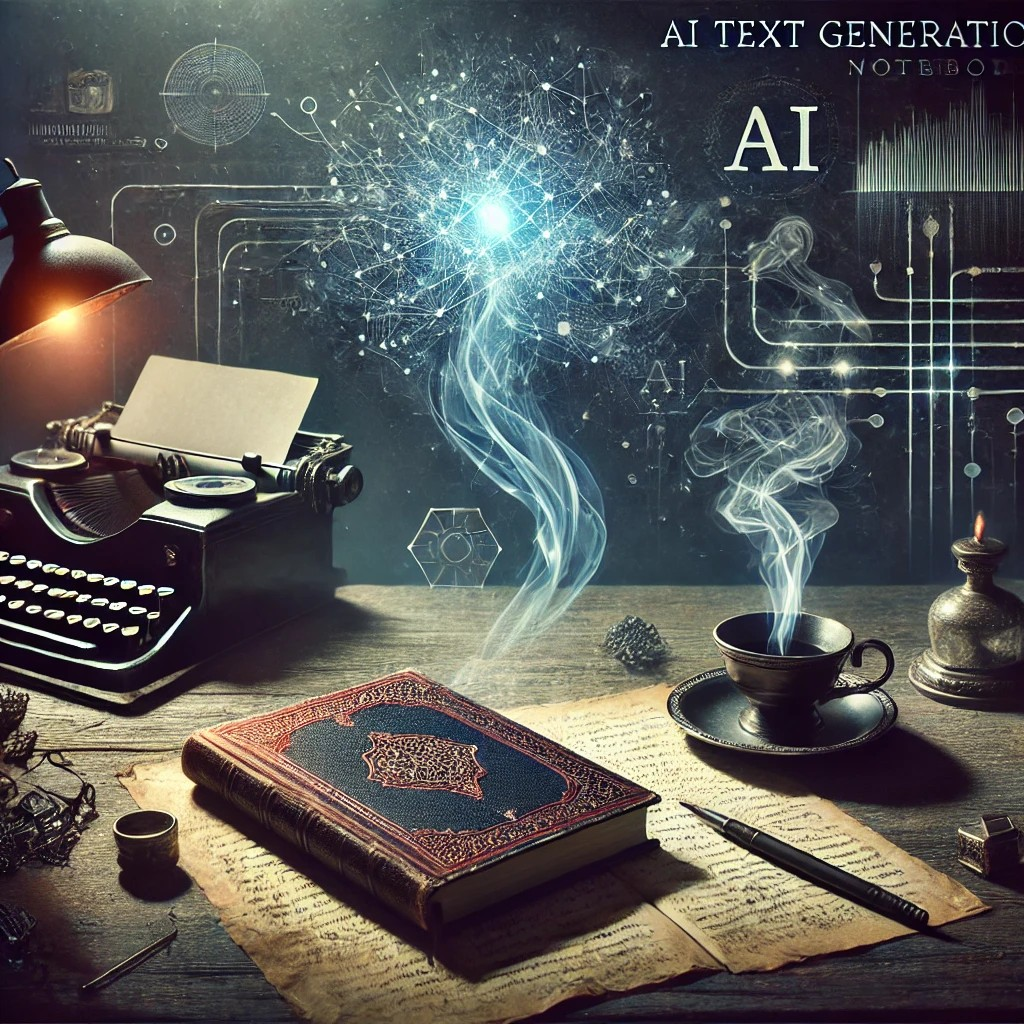

The **Google GEMMA 2 Challenge** (short for Generative Evaluation of Massive Model Applications) is a benchmark created by Google to evaluate large language models, like GPT or other advanced AI systems. GEMMA 2 assesses these models based on their ability to generate coherent, creative, and contextually relevant text across various prompts and scenarios, including complex storytelling, factual accuracy, and contextual understanding.

This challenge is designed to push the boundaries of generative AI capabilities by testing model performance on diverse tasks, ensuring that these systems can produce high-quality output across different use cases and domains.

Model Details
Gemma is Google's family of lightweight, state-of-the art open models built from the same research and technology used to create the Gemini models. Gemma models are available with and without instruction tuning and come in two sizes: 2 billion and 7 billion parameters. Gemma 1.1 is the latest weights refresh. See the model card below for benchmarks, data sources, and intended use cases.

Weights are released under the Gemma License. Keras model code is released under the Apache 2 License.

Links
Gemma API Documentation
Gemma Model Card
KerasHub Beginner Guide
KerasHub Model Publishing Guide
Installation
Keras and Kerashub can be installed with:

pip install -U -q keras-hub
pip install -U -q keras>=3
Jax, TensorFlow, and Torch come preinstalled in Kaggle Notebooks. For instructions on installing them in another environment see the Keras Getting Started page.



# By: John Chilton CodeAI

# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Since you're working with a local HTML file (from the Project Gutenberg zip), you can extract the text using Python libraries like BeautifulSoup to parse the HTML content. Here’s a quick guide on how to extract the text from that HTML file.

In [3]:
from bs4 import BeautifulSoup

# Path to your HTML file
html_file_path = r"/content/pg10-images.html"

# Open and read the HTML file
with open(html_file_path, "r", encoding="utf-8") as html_file:
    soup = BeautifulSoup(html_file, "html.parser")

# Extract the text from the HTML content
extracted_text = soup.get_text()

# Optional: Save the extracted text to a file for easier review
output_file = "extracted_bible_text.txt"
with open(output_file, "w", encoding="utf-8") as text_file:
    text_file.write(extracted_text)

print(f"Text successfully extracted and saved to {output_file}")


Text successfully extracted and saved to extracted_bible_text.txt


To begin text preprocessing for the King James Bible, we typically follow several steps to clean and prepare the text for analysis or modeling. Here's how we can approach it:

Steps for Text Preprocessing:
Lowercasing: Convert all text to lowercase to ensure uniformity.
Removing Non-Alphanumeric Characters: Remove punctuation, special characters, and numbers.
Tokenization: Split the text into individual words (tokens).
Stopword Removal: Remove common words (e.g., "the", "and", "is") that do not add much meaning.
Lemmatization or Stemming: Reduce words to their base or root form.
Optional - Keep Structure: If needed, preserve structure (e.g., chapters and verses) for referencing purposes.
Code to Preprocess the Bible Text:

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure stopwords and tokenizer are downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Path to the extracted text file
file_path = "/content/extracted_bible_text.txt"

# Load the text from the file
with open(file_path, "r", encoding="utf-8") as file:
    bible_text = file.read()

# Step 1: Convert text to lowercase
bible_text = bible_text.lower()

# Step 2: Remove non-alphanumeric characters (keep spaces)
bible_text = re.sub(r'[^a-z\s]', '', bible_text)

# Step 3: Tokenize the text into words
tokens = word_tokenize(bible_text)

# Step 4: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Step 5: Lemmatization (convert words to base form)
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

# Optional: Join the lemmatized tokens back into a string (if needed for further processing)
preprocessed_text = ' '.join(lemmatized_tokens)

# Save the preprocessed text to a file
output_file = "preprocessed_bible_text.txt"
with open(output_file, "w", encoding="utf-8") as file:
    file.write(preprocessed_text)

print(f"Text preprocessing complete. Preprocessed text saved to {output_file}.")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Text preprocessing complete. Preprocessed text saved to preprocessed_bible_text.txt.


# Log Into Hugging Face

In [5]:
from huggingface_hub import notebook_login

# Log in to your Hugging Face account
notebook_login()


# Load the Model

In [6]:
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load tokenizer and model from Hugging Face
tokenizer = AutoTokenizer.from_pretrained("google/gemma-2-9b")
model = AutoModelForCausalLM.from_pretrained("google/gemma-2-9b")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

model-00001-of-00008.safetensors:   0%|          | 0.00/4.84G [00:00<?, ?B/s]

model-00002-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00004-of-00008.safetensors:   0%|          | 0.00/4.93G [00:00<?, ?B/s]

model-00005-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00006-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00007-of-00008.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00008-of-00008.safetensors:   0%|          | 0.00/2.38G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/8 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

# Generate Text Prompts

## Prompt_1:

This prompt sets up a text generation model to complete the phrase “In the beginning God created” using a pipeline from Hugging Face's transformers library. It generates up to 100 tokens, limiting to one sequence, and truncates if the generated text exceeds the set length. Finally, it outputs and displays the generated continuation.

In [7]:
from transformers import pipeline

# Set up the text generation pipeline and ensure GPU usage
generator = pipeline('text-generation', model=model, tokenizer=tokenizer, device=0)

# Define a prompt to generate text
prompt = "In the beginning God created"

# Generate text from the model with specified length and truncation
output = generator(prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

In the beginning God created the heavens and the earth. Now the earth was formless and empty, darkness was over the surface of the deep, and the Spirit of God was hovering over the waters. And God said, “Let there be light,” and there was light. God saw that the light was good, and he separated the light from the darkness. God called the light “day,” and the darkness he called “night.” And there was evening, and there was morning—the first


## Prompt_2:

This prompt defines a new starting text, “And the Lord spoke to Moses, saying,” for the model to continue generating text. It generates up to 100 tokens in one sequence and truncates any excess. The resulting continuation is then printed.

In [8]:
# Define a new prompt for text generation
new_prompt = "And the Lord spoke to Moses, saying,"

# Generate text from the model based on the new prompt
output = generator(new_prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

And the Lord spoke to Moses, saying, “Speak to the children of Israel, and say to them, ‘When you come into the land of your habitation, which I give to you, and shall make a plague among you, then you shall take a heifer, the first of the herd, and offer her a burnt offering to the Lord. The priest shall take some of the blood of the burnt offering and put it on the horns of the altar, and the rest of the blood


## Prompt_3

This prompt begins with the text “The Lord is my shepherd; I shall not want” for the model to expand upon. It generates up to 100 tokens in a single sequence, truncating if necessary, and then outputs the generated continuation.

In [9]:
# Define a new prompt for text generation
another_prompt = "The Lord is my shepherd; I shall not want."

# Generate text from the model based on the new prompt
output = generator(another_prompt, max_length=100, num_return_sequences=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

The Lord is my shepherd; I shall not want. He maketh me to lie down in green pastures: he leadeth me beside the still waters. He restoreth my soul: he leadeth me in the paths of righteousness for his name's sake. Yea, though I walk through the valley of the shadow of death, I will fear no evil: for thou art with me; thy rod and thy staff they comfort me. Thou preparest a table before me in the


## Prompt_4:

This prompt starts with the text “Blessed are the peacemakers, for they shall be called” for the model to continue generating. It produces up to 100 tokens with adjustments to reduce repetition, including sampling with a `temperature` setting and a `repetition_penalty` of 1.2 to enhance variety in the output. The resulting text is then printed.

In [10]:
# Define a new prompt for text generation
new_prompt = "Blessed are the peacemakers, for they shall be called"

# Generate text with modified parameters to reduce repetition
output = generator(new_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)


# Print the generated text
print(output[0]['generated_text'])

Blessed are the peacemakers, for they shall be called children of God. (Jesus)

We have been having an ongoing series on “The Beatitudes: Jesus’ Manifesto.” This past week our Bible study looked at Matthew 5:9 where it says blessed are the peacemakers; and this is really a broad subject and we could go all over creation to talk about many things related to what that means—including those who teach Peace Studies like my next-door neighbor did as professor in


## Prompt_5:

This prompt begins with “And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away” for the model to expand upon. It generates up to 100 tokens, with settings to reduce repetition—using sampling (`temperature=True`) and a repetition penalty of 1.2. The generated continuation is then printed.

In [11]:
# Define a new prompt for text generation
revelation_prompt = "And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away"

# Generate text with modified parameters to reduce repetition
output = generator(revelation_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

And I saw a new heaven and a new earth, for the first heaven and the first earth were passed away. And there was no more sea.(Revelation 21:1)

So in these days many who have been following Jesus closely are hearing from the Spirit to begin moving into their next phase of maturity and preparation by becoming very still – resting quietly on His chest as He leads them deeper along life’s journey toward holiness which is nothing other than being conformed ever so much like


## Prompt_6:

This prompt begins with “Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition” for the model to continue. It generates up to 100 tokens, applying settings to reduce repetition with sampling (`temperature=True`) and a repetition penalty of 1.2, and then prints the generated text.

In [12]:
# Define a new prompt for text generation
jobs_prompt = "Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition."

# Generate text with modified parameters to reduce repetition
output = generator(jobs_prompt, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

Your time is limited, so don't waste it living someone else's life. Have the courage to follow your heart and intuition.

Here will be some tips how you can save this wonderful moments or events in perfect quality for all future times!


<strong>TIP 1:</strong> Do not allow a lot of visitors who are more like photo bombers than being supportive when asked them politely if they could step back during photoshootings with me (see tip nr3-5)
(I


## Prompt_7:

This prompt starts with “We are effectively destroying ourselves by violence masquerading as love” for the model to expand upon. It generates up to 100 tokens with settings to enhance diversity, using sampling (`temperature=True`) and a repetition penalty of 1.2, then prints the resulting continuation.

In [13]:
# Define a new prompt for text generation
Ronald_David_Laning = "We are effectively destroying ourselves by violence masquerading as love."

# Generate text with modified parameters to reduce repetition
output = generator(Ronald_David_Laning, max_length=100, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

We are effectively destroying ourselves by violence masquerading as love.
For we do not know that war is a disease, and the patient it destroys is humanity — <strong>Albert Einstein</strong>

Since all things in this universe have either an end or beginning for some reason then why could death be considered otherwise? As per my humble estimation, our society has lost its belief on God’s grace after having witnessed numerous atrocities throughout history which made us to believe that peace would never come back again at least


## Prompt_8:

This prompt starts with “write a ship manifest of religious items stolen,” guiding the model to generate a detailed list or narrative. It produces up to 1000 tokens with settings for creative variation, using sampling (`temperature=True`) and a repetition penalty of 1.2, then outputs the generated text.

In [14]:
# Define a new prompt for text generation
Pirate = "write a ship manifest of religious items stolen"

# Generate text with modified parameters to reduce repetition
output = generator(Pirate, max_length=1000, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

write a ship manifest of religious items stolen from the holy temple in jerusalem 1948
Write out, and send me an e-mail stating all you know about "The Holy Temple" as stated by your scripture. Please include where it is located (address), who's on duty there when open to public? Hours etc.. Also state what day that Jesus came back after being betrayed for thirty pieces (30) silver coins?! By Judas Iscariot; Who said he was too close with his 'boss', whom had asked him not only twice but three times...before finally taking up arms against our Lord! After they captured Him - They took off His robe & clothing while putting their own rags around themselves so no one could recognize them.Then Pilate called Barabbas instead....and we do know if anyone killed this man--would most certainly have been punished severely enough never again!


## Prompt_9:

This prompt begins with “The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies,” inviting the model to continue with a fantasy-themed narrative. It generates up to 500 tokens with settings for creative output, using sampling (`temperature=True`) and a repetition penalty of 1 to encourage variety, then prints the generated continuation.

In [15]:
# Define a new prompt for text generation
writer = "The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies."

# Generate text with modified parameters to reduce repetition
output = generator(writer, max_length=500, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

The ancient door creaked open, revealing a hidden world beyond the mountains, where dragons still soared across the skies. The sound of their wings echoed through the cavernous halls, as if the heavens themselves were whispering secrets.

The dragons' eyes shone with fire and curiosity, eager to explore the unknown realm that lay before them. Their scales glistened in the sunlight filtering through cracks in the rock, reflecting the colors of the rainbow.

As they flew, the dragons felt a tingling sensation in their bodies, as if their blood was being infused with ancient magic. The air around them felt charged with power, ready to be harnessed by the ones who wielded the true power.

The dragons landed gracefully on a rocky outcropping, breathing in the sweet scent of freedom that filled the air around them. They felt a sense of purpose that they had never felt before, as if they were meant to lead their kind to greatness.

But they knew that with great power came great responsibility

## Prompt_10:

This prompt begins with “What is 9,000 * 9,000?” prompting the model to calculate or discuss this mathematical expression. It generates up to 500 tokens with creative variation settings, using sampling (`temperature=True`) and a repetition penalty of 1 to allow diverse responses, then outputs the generated result.

In [16]:
# Define a new prompt for text generation
Math_Expert = "What is 9,000 * 9,000?"

# Generate text with modified parameters to reduce repetition
output = generator(Math_Expert, max_length=500, num_return_sequences=1, temperature=True, do_sample=True, repetition_penalty=1, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

What is 9,000 * 9,000?

[Answer 1]

It is $912121=3 \cdot 380404=3\cdot 2^3\cdot 19\cdot 763.$

[Answer 2]

<em>I'm not sure about the format of this answer, but here it goes...</em>

What is the result when multiplying $9,000$ and $9,000$?

$9,000$ has $4$ significant digits (one non-zero digit and only zeros after).

When multiplying any two numbers with significant digits, the product should have only zero digits after the product of the significant digits.

So, the product of $9,000$ and $9,000$ is $81,000,000=81000000$ with only zero (0) digits after significant digits.


## Prompt_11:

This prompt, titled **Detective_Noir**, sets the scene for a suspenseful, noir-style story. It instructs the model to create a narrative where a hard-boiled, skeptical detective in a dark, smoky room gradually uncovers a hidden biblical mystery.

The details emphasize a gritty atmosphere, with dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy written in an unfamiliar language. The story should evoke moral ambiguity and a sense of impending doom as the detective, haunted by his past, deciphers each clue in the hidden gospel.

The generation parameters:
- **max_length=1000**: Allows for an extended, in-depth narrative.
- **temperature=0.7**: Adds creative variation while maintaining coherence.
- **repetition_penalty=1.2**: Reduces repetitive phrasing, supporting a suspenseful flow.
- **do_sample=True**: Enhances creativity in the generated story.

The final output is printed, presenting the noir-style mystery as generated text.

In [17]:
# Define the noir-style prompt
Detective_Noir = """
Narrate a suspenseful, noir-style story where a gritty, hard-boiled detective in a dark, smoky room uncovers a hidden biblical mystery.
The detective is skeptical, chain-smoking, and haunted by his own past.
The setting should be shadowy, with descriptions of dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy in an unfamiliar language.
Emphasize the detective's sense of moral ambiguity and a feeling of impending doom as he uncovers each clue in the hidden gospel.
"""

# Generate text with noir and suspenseful tones
output = generator(Detective_Noir, max_length=1000, num_return_sequences=1, temperature=0.7, do_sample=True, repetition_penalty=1.2, truncation=True)

# Print the generated text
print(output[0]['generated_text'])

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset



Narrate a suspenseful, noir-style story where a gritty, hard-boiled detective in a dark, smoky room uncovers a hidden biblical mystery. 
The detective is skeptical, chain-smoking, and haunted by his own past. 
The setting should be shadowy, with descriptions of dim lighting, thick smoke, and a mysterious leather-bound book containing an ancient prophecy in an unfamiliar language. 
Emphasize the detective's sense of moral ambiguity and a feeling of impending doom as he uncovers each clue in the hidden gospel.

